In [7]:
import pandas as pd

# prerequisites
import torch
th = torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'serif'
import numpy as np


from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

to_tensor = lambda x: torch.tensor(x).to(torch.float32)

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class CustomDataset(Dataset):
    def __init__(self, X, y):
        # Generate random data for X with shape (N, 20)
        self.X = X
        # Generate random data for y with shape (N, 18, 10)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [312]:
# IMPORT DATA HERE

df = pd.read_csv(r"data/FINALDATA.csv")

X = th.tensor(df[['Panel_{}'.format(_i) for _i in range(20)]].values)
y = th.tensor(df[['Sensor_{}'.format(_i) for _i in range(180)]].values).reshape(X.shape[0], 18, 10) / 100.

In [9]:
# IMPORT DATA HERE

df = pd.read_csv(r"data/Orientation - Optimal.csv")

_X = df[['Panel_{}'.format(_i) for _i in range(20)]].values
orient = df[['Orientation_0']].values / 180.
X = th.tensor(np.hstack((_X, orient)))
y = th.tensor(df[['Sensor_{}'.format(_i) for _i in range(180)]].values) / 100.

In [273]:
np.arange(len(df))[df['Orientation_0'].values==0]

array([   0,    1,   14,   27,   40,   53,   66,   79,   92,  105,  118,
        131,  144,  157,  170,  183,  196,  209,  222,  235,  248,  261,
        274,  287,  300,  313,  326,  339,  352,  365,  378,  391,  404,
        417,  430,  443,  456,  469,  482,  495,  508,  521,  534,  547,
        560,  573,  586,  599,  612,  625,  638,  651,  664,  677,  690,
        703,  716,  729,  742,  755,  768,  781,  794,  807,  820,  833,
        846,  859,  872,  885,  898,  911,  924,  937,  950,  963,  976,
        989, 1002, 1015, 1028, 1041, 1054, 1067, 1080, 1093, 1106, 1119,
       1132, 1145, 1158, 1171, 1184, 1197, 1210, 1223, 1236, 1249, 1262,
       1275, 1288])

In [ ]:
y = y.reshape(X.shape[0], 18, 10)

In [279]:
df['Orientation_0'][128]

165

In [240]:
orient.shape

(1302, 1)

In [308]:
dataset[0][0]

tensor([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.])

In [313]:
X = X.to(th.float32)
y = y.to(th.float32)

In [19]:
def from_br(flattened_array):
    original_shape = num_rows, num_columns = (18, 10)
    # Reshape the flattened array back into a 2D grid
    grid = flattened_array.reshape(original_shape)
    # Initialize an empty list to store the remapped values
    remapped_values = []
    # Iterate through the rows in reverse order
    for row in reversed(range(num_rows)):
        # Iterate through the columns from left to right
        for col in range(num_columns):
            # Append the value at (row, col) to the remapped values list
            remapped_values.append(float(grid[row, col]))
    return th.tensor(remapped_values).reshape(original_shape)
from_br(y[0])

tensor([[0.3978, 0.3997, 0.3967, 0.3944, 0.4025, 0.4024, 0.4112, 0.3947, 0.4119,
         0.3775],
        [0.4135, 0.4114, 0.0229, 0.2179, 0.2818, 0.3780, 0.3888, 0.3902, 0.4011,
         0.3758],
        [0.4051, 0.4195, 0.4170, 0.4046, 0.3992, 0.4126, 0.3973, 0.4275, 0.4216,
         0.4068],
        [0.4377, 0.4446, 0.4454, 0.4177, 0.2354, 0.3513, 0.3987, 0.4105, 0.4087,
         0.4106],
        [0.4366, 0.4113, 0.4337, 0.4264, 0.4054, 0.4213, 0.4170, 0.4123, 0.4362,
         0.4128],
        [0.4271, 0.4330, 0.4414, 0.4455, 0.4287, 0.4323, 0.3082, 0.3986, 0.4201,
         0.4265],
        [0.4276, 0.4385, 0.4365, 0.4354, 0.4279, 0.4331, 0.4368, 0.4216, 0.4346,
         0.4317],
        [0.4279, 0.4320, 0.4144, 0.4455, 0.4348, 0.4478, 0.4484, 0.4281, 0.3635,
         0.3812],
        [0.3729, 0.4021, 0.4297, 0.4271, 0.4328, 0.4174, 0.4330, 0.4434, 0.4309,
         0.4288],
        [0.4285, 0.4325, 0.4406, 0.4197, 0.4387, 0.4394, 0.4340, 0.4404, 0.4323,
         0.4289],
        [0

[0.08333333]


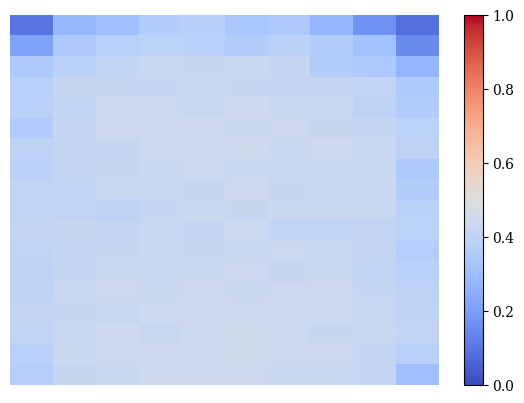

In [30]:
def visualize_sensors(sensors, threshold=40):
    fig, ax = plt.subplots()

    threshold=40
    booleangrid=np.asarray(sensors)>threshold
    intgrid=booleangrid*1
    
    plt.pcolormesh(sensors, cmap='coolwarm', vmin=0, vmax=1)
    im_ratio = sensors.shape[0]/sensors.shape[1]
    plt.colorbar(fraction=0.047*im_ratio)
    plt.axis('off')
    # for x in range(len(filtered)):
    #     plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=1)
    
    # def count(booleangrid):
    #     return booleangrid.count(True)
    
    # print("Total % of Area =", booleangrid.sum() / 180)
    # plt.show()
i=2
print (orient[i])
visualize_sensors(from_br(y[i]))


In [314]:
# Instantiate the dataset
dataset = CustomDataset(X,y)

In [315]:
# Define the split sizes
eval_percent = 0.10
num_eval = int(len(dataset) * eval_percent)
num_train = len(dataset) - num_eval

# Randomly split the dataset into training and evaluation datasets
train_dataset, test_dataset = random_split(dataset, [num_train, num_eval])

# print(f"Training dataset size: {len(train_dataset)}")
# print(f"Test dataset size: {len(test_dataset)}")

# Set batch size
batch_size = 50

# Create DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for the evaluation dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [316]:
import os
import torch

def save_models(models, folder_path):
    # Create the directory if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save each model
    for model in models:
        model_name = type(model).__name__  # Get the class name of the model
        file_path = os.path.join(folder_path, f"{model_name}.pt")
        torch.save(model.state_dict(), file_path)

    print("Models saved successfully.")

# Example usage:
# save_models([model1, model2], "/path/to/folder")

def load_models(model_objects, folder_path):
    # Load the state dicts for each model
    for model in model_objects:
        model_name = type(model).__name__  # Get the class name of the model
        file_path = os.path.join(folder_path, f"{model_name}.pt")
        model.load_state_dict(torch.load(file_path))

    print("Models loaded successfully.")

# Example usage:
# load_models([model1, model2], "/path/to/folder")



In [317]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomConvNet(nn.Module):
    def __init__(self, num_1d_layers=3, num_2d_layers=2):# num_channels=180):
        super(CustomConvNet, self).__init__()
        
        # Define initial parameters for the 1D conv layers
        initial_channels = 16  # Initial number of channels
        self.shape_1d = 20
        self.shape_2d = (18, 10)
        
        # 1D Convolutional Layers
        self.conv1d_layers = nn.ModuleList()
        in_channels = 1
        for i in range(num_1d_layers - 1):
            out_channels = initial_channels * (2 ** i)
            self.conv1d_layers.append(nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm1d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(0.1)  # Regularization
            ))
            in_channels = out_channels
        
        # Last 1D convolution to adjust the channel size exactly to num_channels
        self.conv1d_layers.append(nn.Conv1d(in_channels, self.shape_2d[0] * self.shape_2d[1], 
                                            kernel_size=3, stride=1, padding=1))

        # 2D Convolutional Layers
        self.conv2d_layers = nn.ModuleList()
        in_channels = self.shape_1d
        for i in range(num_2d_layers):
            out_channels = 32 if i < num_2d_layers - 1 else 1  # Final output channel set to 1
            self.conv2d_layers.append(nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=(3, 3), stride=1, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(0.2)  # Regularization
            ))
            in_channels = out_channels

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (N, 1, L) where L is the sequence length

        # Apply 1D convolutions
        for layer in self.conv1d_layers:
            x = layer(x)

        # Reshape to 2D (N, C, 18, 10)
        x = x.view(x.size(0), -1, 18, 10)  # -1 here will automatically adjust to num_channels
        
        # Apply 2D convolutions
        for layer in self.conv2d_layers:
            x = layer(x)

        return x.squeeze(1)
        
    def forward_encode(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (N, 1, L) where L is the sequence length
        # Apply 1D convolutions
        for layer in self.conv1d_layers:
            x = layer(x)
            
        # Reshape to 2D (N, C, 18, 10)
        x = x.view(x.size(0), -1, 18, 10)  # -1 here will automatically adjust to num_channels
        return x

    def forward_decode(self, x):
        # Apply 2D convolutions
        
        for layer in self.conv2d_layers:
            x = layer(x)
        return x.squeeze(1)


class TransferLearningModel(nn.Module):
    def __init__(self):
        dim_model=20
        
        super(TransferLearningModel, self).__init__()
        self.proj_angle = nn.Linear(1,dim_model)
        self.linear = nn.Linear(dim_model, dim_model)
        
        # self.proj_1d_vec = nn.Linear(180,dim_model)
        # self.map_combined = nn.Linear(dim_model,180)
        self.pretrained = None
        
    def set_pretrained(self, model):
        self.pretrained = model

    def forward(self, input_):
        assert self.pretrained is not None

        x = input_[:,:20]
        a = input_[:,20:21]
        x_ = self.pretrained.forward_encode(x)

        a_ = self.proj_angle(a)
        a_ = self.linear(a_)
        a_ = th.nn.functional.relu(x_)
        
        # a_ = self.proj_angle(a)
        # x_ = self.proj_1d_vec(x_)
        
        x_ = a_ + x_
        #x_ = self.map_combined(x_)
        x_ = self.pretrained.forward_decode(x_)
        return x_


In [13]:
# (th.arange(3).reshape(1,3,1,1) + th.rand(1,3,3,3))[0,1]

In [318]:

def train_model(model, optimizer, train_loader, losses, epochs=1000):
    model.train()
    losses_ = losses.setdefault('train',{})

    n_updates = 0
    test(model, losses, -1, n_updates)
    for epoch in range(epochs):
        loss, metric = 0., 0.
        for iter, (inputs, targets) in enumerate(train_loader):
            
            optimizer.zero_grad()
            outputs = model(inputs)
            _loss = train_loss_func(outputs, targets)
            _loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            _metric = test_eval_func(outputs.detach(), targets)
            
            losses_.setdefault('loss', []).append(_loss.detach())
            losses_.setdefault('metric', []).append(_metric.detach())
            losses_.setdefault('n_updates', []).append(n_updates)
            
            n_updates += 1
            loss = _loss.detach() + loss
            metric = _metric + metric
            
        loss /= (iter + 1)
        metric /= (iter + 1)

        if (epoch+1) % 5 == 0:
            print(f'TRAIN | Epoch {epoch+1}, Loss: {loss.item():.4f}, Metric: {metric.item():.4f}')
            test(model, losses, epoch, n_updates)

def test(model, losses, epoch, n_updates):
    _ = model.eval()
    losses_ = losses.setdefault('test',{})

    loss, metric = th.tensor(0.), th.tensor(0.)
    with torch.no_grad():
        for iter, (inputs, targets) in enumerate(test_loader):
            outputs = model(inputs)
            _loss = train_loss_func(outputs.detach(), targets.detach())
            _metric = test_eval_func(outputs.detach(), targets.detach())
            loss = _loss.item() + loss
            metric = _metric.item() + metric
            
        loss /= (iter + 1)
        metric /= (iter + 1)
        losses_.setdefault('loss', []).append(loss)
        losses_.setdefault('metric', []).append(metric)
        losses_.setdefault('n_updates', []).append(n_updates)
            
    print(f'... TEST | Epoch {epoch+1}, Loss: {loss.item():.4f}, Metric: {metric.item():.4f}')


In [319]:
class MAPELoss(torch.nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()

    def forward(self, y_true, y_pred):
        epsilon = 1e-8
        percentage_error = torch.abs((y_true - y_pred) / (torch.abs(y_true) + epsilon))
        mape = torch.mean(percentage_error) * 100.0
        return mape

train_loss_func = MAPELoss()
test_eval_func = nn.MSELoss()
# train_loss_func = nn.MSELoss()
# test_eval_func = MAPELoss()

# TRAINING: Config to DA
## without orientation

In [320]:

# Create the model
model = CustomConvNet(num_1d_layers=3, num_2d_layers=2)

if False: # test the model
    #print(model)
    # Creating a dummy input tensor of shape (N, L), where L=20
    input_tensor = torch.randn(5, 20)  # 5 examples, each 1 x 20
    # Forward pass
    output = model(input_tensor)
    print("Output shape:", output.shape)

In [327]:
print(dataset[0][0])

tensor([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.])


In [328]:
model(dataset[0][0].unsqueeze(0))


tensor([[[0.1430, 0.2310, 0.2975, 0.3551, 0.3785, 0.3719, 0.3810, 0.3814,
          0.3844, 0.3984],
         [0.3926, 0.3899, 0.3748, 0.3738, 0.3647, 0.3763, 0.2156, 0.0647,
          0.2975, 0.3703],
         [0.3538, 0.3895, 0.3938, 0.4092, 0.4006, 0.4140, 0.4304, 0.4293,
          0.4298, 0.3971],
         [0.4131, 0.4078, 0.3970, 0.3871, 0.3646, 0.3641, 0.3268, 0.3605,
          0.3956, 0.4227],
         [0.4004, 0.4186, 0.4255, 0.4246, 0.4225, 0.4291, 0.4386, 0.4419,
          0.4261, 0.4161],
         [0.4142, 0.3944, 0.3638, 0.2341, 0.3863, 0.3901, 0.3968, 0.4169,
          0.4172, 0.4249],
         [0.4292, 0.4275, 0.4379, 0.4382, 0.4358, 0.4354, 0.4409, 0.4282,
          0.4280, 0.4016],
         [0.3877, 0.2795, 0.3498, 0.3934, 0.4110, 0.4115, 0.4247, 0.4275,
          0.4321, 0.4303],
         [0.4290, 0.4297, 0.4409, 0.4343, 0.4431, 0.4398, 0.4369, 0.4241,
          0.4055, 0.2743],
         [0.3523, 0.3977, 0.4163, 0.4215, 0.4163, 0.4208, 0.4297, 0.4300,
          0.4279,

In [326]:
save_models([model], "model_mape_norm/")

Models saved successfully.


In [323]:
# Train model

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = {}
train_model(model, optimizer, train_loader, losses,  epochs=50)

... TEST | Epoch 0, Loss: 4.7621, Metric: 0.0008
TRAIN | Epoch 5, Loss: 4.5863, Metric: 0.0007
... TEST | Epoch 5, Loss: 4.8673, Metric: 0.0007
TRAIN | Epoch 10, Loss: 4.5905, Metric: 0.0007
... TEST | Epoch 10, Loss: 2541.6975, Metric: 0.0007
TRAIN | Epoch 15, Loss: 4.5585, Metric: 0.0007
... TEST | Epoch 15, Loss: 4.6656, Metric: 0.0007
TRAIN | Epoch 20, Loss: 10.5561, Metric: 0.0007
... TEST | Epoch 20, Loss: 4.7587, Metric: 0.0007
TRAIN | Epoch 25, Loss: 4.5177, Metric: 0.0007
... TEST | Epoch 25, Loss: 4.7023, Metric: 0.0007


KeyboardInterrupt: 

In [108]:
# losses['train']['loss']

<function matplotlib.pyplot.xscale(value, **kwargs)>

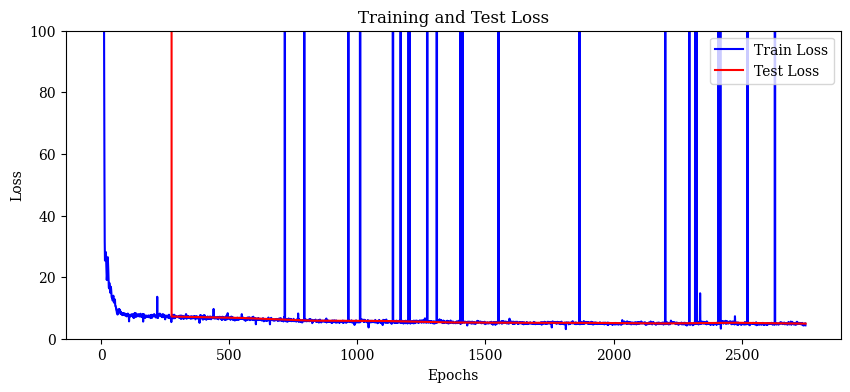

In [107]:
import matplotlib.pyplot as plt

# Plotting the loss
fig, ax = plt.subplots(figsize=(10,4))
key='loss'
ax.plot(losses['train']['n_updates'], losses['train'][key], label='Train Loss', c='blue')
ax.plot(losses['test']['n_updates'], losses['test'][key], label='Test Loss', c='red')

# Adding labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Test Loss')

ax.set_ylim(0,100)
# ax.set_xlim(0,100)
# Adding legend
ax.legend()

# Displaying the plot
plt.xscale

# TRAINING: Config + Orientation to DA

In [16]:
pretrained = CustomConvNet(num_1d_layers=3, num_2d_layers=2)
load_models([pretrained], "model_mape_norm/")

Models loaded successfully.


In [17]:
model = TransferLearningModel()
model.set_pretrained(pretrained)

In [18]:
# pretrained.forward_encode(dataset[0:2][0][:,:20]).shape
model.forward(dataset[0:2][0]).shape

torch.Size([2, 18, 10])

In [20]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses_transfer = {}
train_model(model, optimizer, train_loader, losses_transfer,  epochs=50)

... TEST | Epoch 0, Loss: 150565968.0000, Metric: 0.0273
TRAIN | Epoch 5, Loss: 5.9465, Metric: 0.0019
... TEST | Epoch 5, Loss: 6.0792, Metric: 0.0021
TRAIN | Epoch 10, Loss: 5.8684, Metric: 0.0018
... TEST | Epoch 10, Loss: 6.0757, Metric: 0.0020


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 848128 bytes.

In [307]:
dataset[0][0].shape

torch.Size([21])

In [19]:
idx = 4

data_to_test = dataset[idx:idx + 1]

window_cfg_to_test = data_to_test[0][:,:20]
orient_to_test = data_to_test[0][:,20:21]
# orient_to_test = orient_to_test + (180/180)

truth = data_to_test[1].reshape(10,18)
input_to_test = th.cat((window_cfg_to_test, orient_to_test), dim=1)

pred = model(input_to_test).detach().squeeze().reshape(10,18).numpy()
print('Orientation: {}'.format(orient_to_test.item() * 180))
print('Predictions')
visualize_sensors(pred)
print('Truth')
visualize_sensors(truth)


Orientation: 45.0
Predictions


NameError: name 'visualize_sensors' is not defined

# SAVING

In [116]:
### SAVE MODEL
save_models([model], "model_mape_norm/")
# save_models([model], "model/")

Models saved successfully.


In [18]:
### LOAD MODEL
load_models([model], "model/")

Models loaded successfully.


# Visualise

In [202]:
def visualize_sensors(sensors, threshold=40):
    fig, ax = plt.subplots(figsize=(8,4.5))

    threshold=40
    booleangrid=np.asarray(sensors)>threshold
    intgrid=booleangrid*1
    
    plt.pcolormesh(sensors.reshape(10,18), cmap=cmap, vmin=0, vmax=1)
    im_ratio = sensors.shape[0]/sensors.shape[1]
    plt.colorbar(fraction=0.047*im_ratio)
    plt.axis('off')
    for x in range(len(filtered)):
        plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=1)
    
    def count(booleangrid):
        return booleangrid.count(True)
    
    print("Total % of Area =", booleangrid.sum() / 180)
    plt.show()

Total % of Area = 0.0


/var/folders/0k/sjz1x0_n7_12_0wk4kxdkw9w0000gs/T/ipykernel_14117/435443872.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  truth = th.tensor(dataset[566:567][1]).reshape(10,18)
/var/folders/0k/sjz1x0_n7_12_0wk4kxdkw9w0000gs/T/ipykernel_14117/435443872.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(th.tensor(dataset[566:567][0])).detach().numpy().squeeze().reshape(10,18)


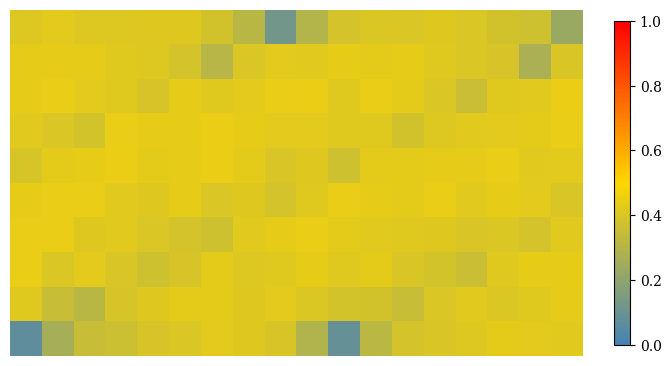

In [203]:

truth = th.tensor(dataset[566:567][1]).reshape(10,18)
pred = model(th.tensor(dataset[566:567][0])).detach().numpy().squeeze().reshape(10,18)

visualize_sensors(truth)

In [23]:
data_to_test = next(iter(train_loader))

In [24]:
model(data_to_test[0])

tensor([[[0.0000, 0.0000, 0.0000,  ..., 1.2300, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9444, 1.1489],
         [1.0919, 0.0000, 0.0066,  ..., 0.0000, 0.0000, 2.8643],
         ...,
         [0.0000, 0.0000, 0.2369,  ..., 0.5144, 1.1000, 0.0549],
         [2.8433, 5.0657, 3.1535,  ..., 1.4734, 5.6012, 2.3601],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0524, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.5850, 0.0000,  ..., 0.0000, 3.2704, 0.0000],
         ...,
         [0.0000, 2.5737, 0.2537,  ..., 0.0000, 3.9112, 0.0000],
         [4.8237, 4.9175, 2.1970,  ..., 1.3911, 2.6238, 0.7938],
         [0.0000, 0.0000, 0.0000,  ..., 1.4777, 0.9994, 0.0000]],

        [[0.0000, 0.0000, 1.2114,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1900,  ..., 1.5574, 2.3863, 0.0000],
         [1.6582, 0.3523, 0.4237,  ..., 3.0993, 0.4625, 0.

In [113]:
# import cmap
# from cmap import Color
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

norm=plt.Normalize(0,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["steelblue", "gold", "red"])

norm_1=plt.Normalize(0, 2)
cmap_1= matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "gray", "black"])

cmap_2 = colors.ListedColormap(['white', 'black', 'red'])
bounds = [0,0.9, 1.2,2.1]
norm_2 = colors.BoundaryNorm(bounds, cmap_2.N)

cmap_3 = colors.ListedColormap(['black', 'red'])
bounds1 = [0,0.9,1.1]
norm_3 = colors.BoundaryNorm(bounds1, cmap_3.N)

In [111]:
# line prep for threshold selection, RERUN EACH ITERATION

import numpy as np
import matplotlib.pyplot as plt

down=[];up=[];left=[];right=[]
for i, eachline in enumerate(intgrid):
    for j, each in enumerate(eachline):
        if each==1:
            down.append([[j,j+1],[i,i]])
            up.append([[j,j+1],[i+1,i+1]])
            left.append([[j,j],[i,i+1]])
            right.append([[j+1,j+1],[i,i+1]])

together=[]
for each in down: together.append(each)
for each in up: together.append(each)
for each in left: together.append(each)
for each in right: together.append(each)

filtered=[]
for each in together:
    c=0
    for EACH in together:
        if each==EACH:
            c+=1
    if c==1:
        filtered.append(each)

Total % of Area = 0.7555555555555555


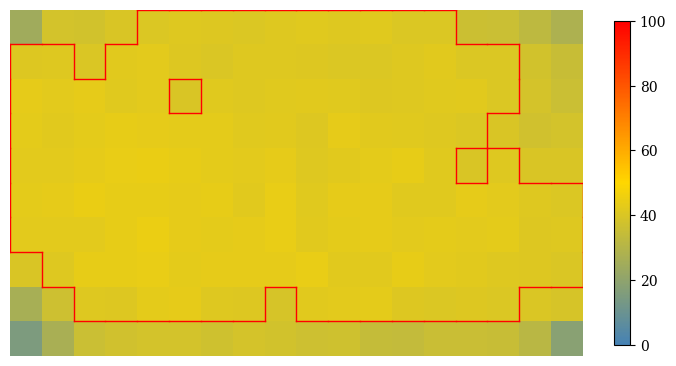

In [28]:
truth = th.tensor(dataset[566:567][1]).reshape(10,18)
pred = model(th.tensor(dataset[566:567][0])).detach().numpy().squeeze().reshape(10,18)

fig, ax = plt.subplots(figsize=(8,4.5))

threshold=40
booleangrid=np.asarray(truth)>threshold
intgrid=booleangrid*1

plt.pcolormesh(truth.reshape(10,18), cmap=cmap, vmin=0, vmax=100)
im_ratio = truth.shape[0]/truth.shape[1]
plt.colorbar(fraction=0.047*im_ratio)
plt.axis('off')
for x in range(len(filtered)):
    plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=1)

def count(booleangrid):
    return booleangrid.count(True)

print("Total % of Area =", booleangrid.sum() / 180)

tensor(10.0160)

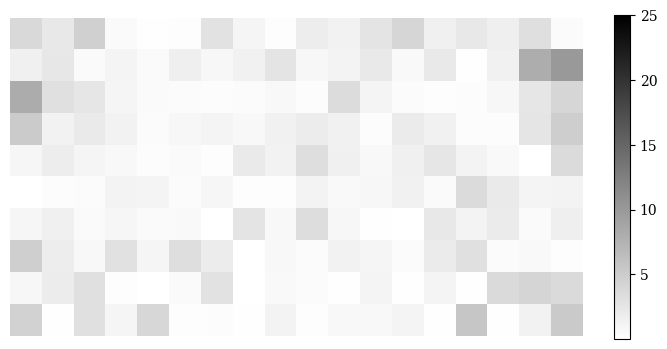

In [29]:
fig, ax = plt.subplots(figsize=(8,4.5))

plt.imshow(np.abs(truth - pred).detach(), cmap = cmap_1, vmax=25) #black is more error
plt.colorbar(fraction=0.047*im_ratio)
plt.axis('off')

th.abs(truth - pred).max()

(0.0, 18.0, 0.0, 10.0)

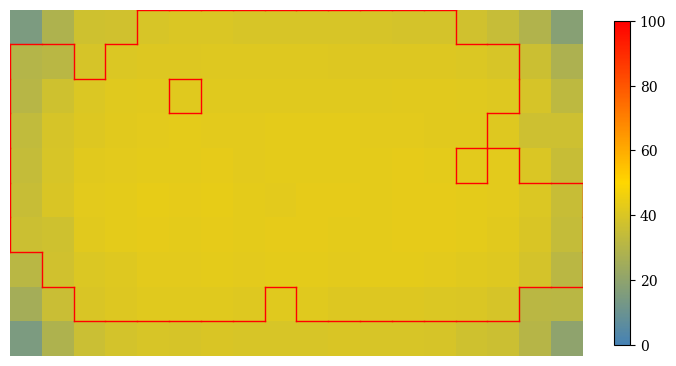

In [30]:
# AVERAGES FOR TEST_DATASET

average_truth = sum(th.tensor(test_dataset[0:299][1])) / len(test_dataset)

avgt = average_truth.reshape(10,18)

average_pred = sum(model(th.tensor(test_dataset[0:299][0]))) / len(test_dataset)

avgp = average_pred.detach().numpy().squeeze().reshape(10,18)

fig, ax = plt.subplots(figsize=(8,4.5))

threshold=40
booleangrid=np.asarray(avgp)>threshold
intgrid=booleangrid*1

plt.pcolormesh(avgp.reshape(10,18), cmap=cmap, vmin=0, vmax=100)
im_ratio = truth.shape[0]/truth.shape[1]
for x in range(len(filtered)):
    plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=1)
    
#plt.imshow(np.abs(avgt - avgp), cmap = cmap_1, vmax=25) #black is more error
plt.colorbar(fraction=0.047*im_ratio)
plt.axis('off')

In [10]:
# SORTING
da = (df['% of Total Area_0'])

sensor = (df['Average Sensor_0'])

sorted_da = np.argsort(da)
other_sorted_da = np.argsort(da)[::-1]

sorted_sensor = np.argsort(sensor)

top_panels_da = X[sorted_da]
top_da = da[sorted_da][::-1][:500]
top_sensor = sensor[sorted_sensor][::-1][:25]

bottom_panels_da = X[other_sorted_da]
bottom_panels_sensor = X[sorted_sensor][:25]
bottom_da = da[sorted_da][:500]
bottom_sensor = sensor[sorted_sensor][:25]

da[sorted_da][::-1][:5]

1326    0.755556
2016    0.755556
398     0.755556
1087    0.755556
566     0.755556
Name: % of Total Area_0, dtype: float64

In [15]:
mask1=(df['Average Sensor_0'] >= 40)
sensor_mask = df[mask1]

common_idx = sorted_da.index.intersection(sensor_mask.index) 
sorted_da_filtered = sorted_da.loc[common_idx]
sensor_mask_filtered = sensor_mask.loc[common_idx] 

sensor_mask_panels = X[sorted_da_filtered]

sensor_mask_panels[sensor_mask_panels == 1] = 2

sorted_da-sorted_da_filtered

smask1 = top_panels_da[11]
smask1[smask1 == 1] = 2
smask2 = top_panels_da[23]
smask2[smask2 == 1] = 2
smask3 = top_panels_da[24]
smask3[smask3 == 1] = 2

top_panels_da[11], top_panels_da[23], top_panels_da[24] = smask1, smask2, smask3

# for plot 2

common_idx1 = other_sorted_da.index.intersection(sensor_mask.index) 
sorted_da_filtered1 = other_sorted_da.loc[common_idx1]
sensor_mask_filtered1 = sensor_mask.loc[common_idx1] 

sensor_mask_panels1 = X[sorted_da_filtered1]

sensor_mask_panels1[sensor_mask_panels1 == 1] = 2

smask4 = bottom_panels_da[6]
smask4[smask4 == 1] = 2
smask5 = bottom_panels_da[11]
smask5[smask5 == 1] = 2
smask6 = bottom_panels_da[14]
smask6[smask6 == 1] = 2
smask7 = bottom_panels_da[16]
smask7[smask7 == 1] = 2

#Swapping the first and third rows
bottom_panels_da[6], bottom_panels_da[11], bottom_panels_da[14], bottom_panels_da[16] = smask4, smask5, smask6, smask7

NameError: name 'top_panels_da' is not defined

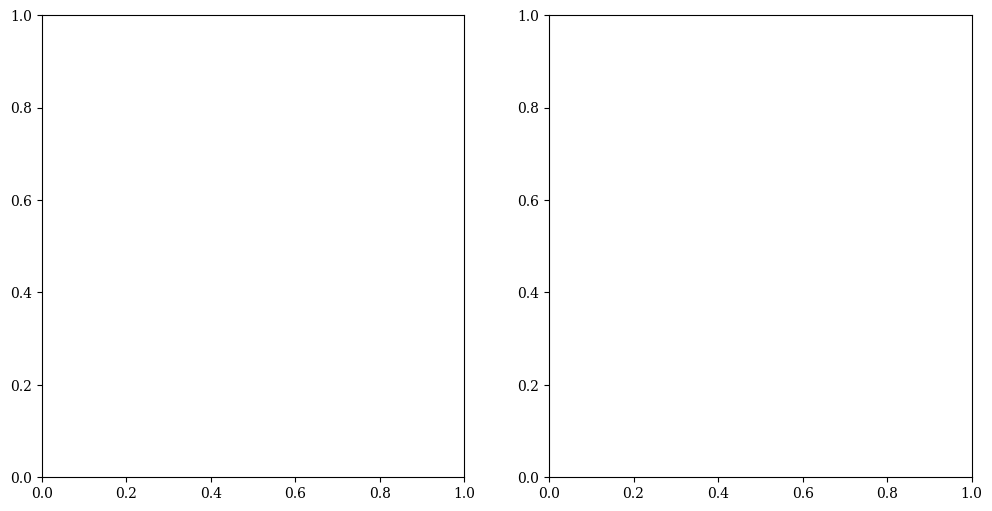

In [14]:
# Plot sorted data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot sorted data as image with flipped orientation
ax1.imshow(top_panels_da[::-1], cmap=cmap_2, norm=norm_2, aspect='auto', extent=[0, 20, 0, len(top_panels_da)])
ax1.set_ylabel('25 of the Highest DA')
ax1.set_xlabel('Panel Binary')

ax2.imshow(bottom_panels_da[::-1], cmap=cmap_2, norm=norm_2, aspect='auto', extent=[0, 20, 0, len(bottom_panels_da)])
ax2.set_ylabel('25 of the Lowest DA')
ax2.set_xlabel('Panel Binary')


In [67]:
# OBJECTIVE SCATTER PLOT (DA and Average Sensor)

top_da_sensor = sensor[top_da.index][::-1][:500]
bottom_da_sensor = sensor[bottom_da.index][:500]

top_da_sensor1 = sorted(sensor[top_da.index])[:500]
bottom_da_sensor1 = sorted(sensor[bottom_da.index])[::-1][:500]

best = np.argsort(bottom_da_sensor1)[::-1][:15]
worst = np.argsort(top_da_sensor1)[:15]

bds_y = sensor[best]
tds_y = sensor[worst]

bds_x = da[best]
tds_x = da[worst]

# display(df.iloc[2219]) # -2

top_da_sensor.shape

(500,)

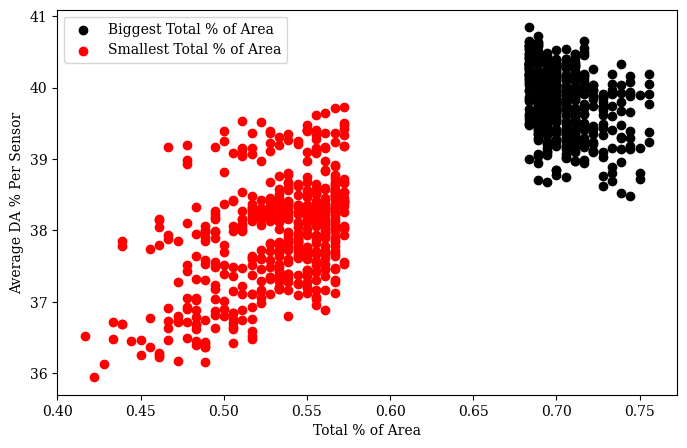

In [52]:
fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_da, top_da_sensor, c ="black", label='Biggest Total % of Area')
plt.scatter(bottom_da, bottom_da_sensor, c ="red", label='Smallest Total % of Area')
plt.legend(loc='upper left')
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()

# plt.savefig('objective_scatterplot.png')

In [24]:
darkcorners = th.tensor(Y[0:3001])

threshold=10
darkboolean=np.asarray(darkcorners)>threshold

# Check for false values along axis 1 (rows)
too_dark = np.any(~darkboolean, axis=1)

# Assign false to rows with false values, true to others
darkboolean[too_dark] = False
darkboolean[~too_dark] = True

filter_dark = darkboolean[:,0].astype(int)

filter_dark


array([0, 0, 0, ..., 0, 0, 1])

In [26]:
sensor

0       38.937944
1       38.677833
2       39.385444
3       39.283222
4       39.526833
          ...    
2996    38.894722
2997    39.265833
2998    38.301167
2999    40.271333
3000    40.026778
Name: Average Sensor_0, Length: 3001, dtype: float64

In [58]:
sensors = df[['Sensor_{}'.format(_i) for _i in range(180)]].values


In [59]:
pc_

39.01831295123848

In [54]:
pc_below_50.max()

1.0

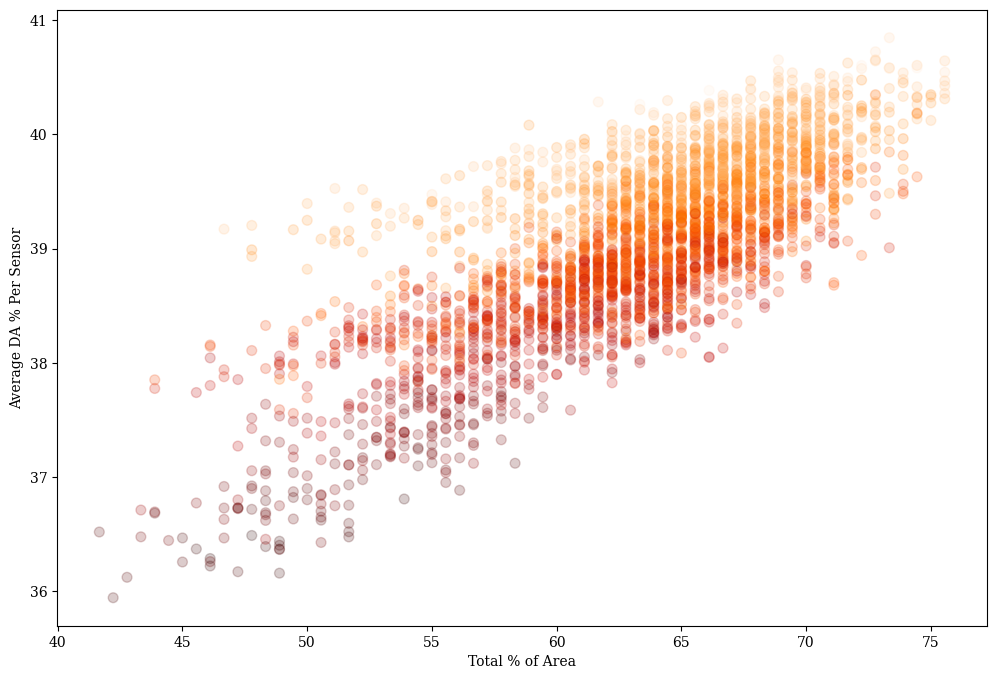

In [65]:

fig, ax = plt.subplots(figsize=(12,8))
pc_below_25 = (sensors < 25.).sum(axis=1)/180
plt.scatter(da * 100, sensor, c=pc_below_25, cmap='gist_heat_r', vmin=0., vmax=0.15, s=50, alpha=0.2)
# plt.legend(loc='upper left')
# plt.yticks(np.arange(1, 100))
# plt.xticks(np.arange(1, 1))
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()

# plt.savefig('objective_scatterplot.png')

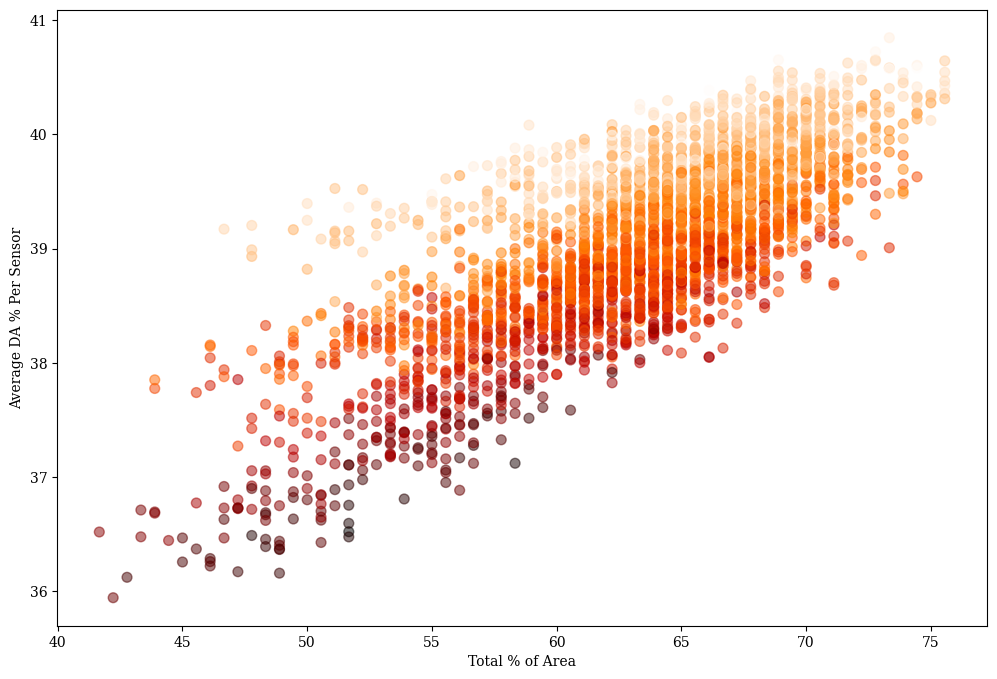

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
sensors_var = sensors.var(axis=1)
plt.scatter(da * 100, sensor, c=sensors_var, cmap='gist_heat_r', vmax=sensors_var.max(), s=50, alpha=0.5)
# plt.legend(loc='upper left')
# plt.yticks(np.arange(1, 100))
# plt.xticks(np.arange(1, 1))
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()


[0.08612022 0.06054645 0.08065574 ... 0.07912568 0.20983607 0.37901639]


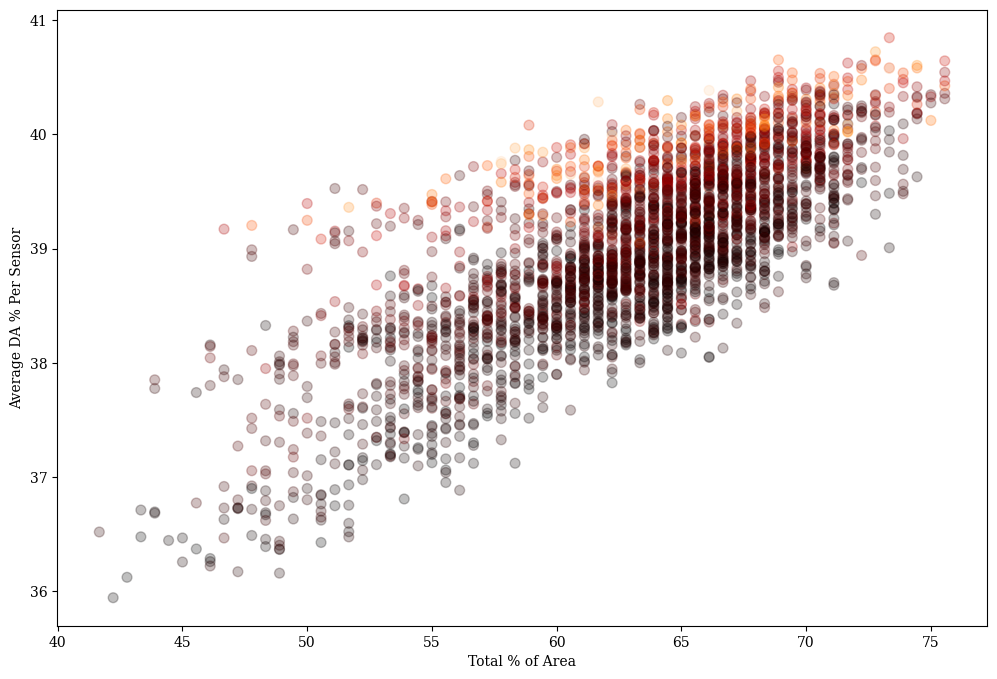

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
min_sensor = (sensors / sensors.max()).min(axis=1)
print(min_sensor)
plt.scatter(da * 100, sensor, c=min_sensor, cmap='gist_heat', s=50, alpha=0.25)
# plt.legend(loc='upper left')
# plt.yticks(np.arange(1, 100))
# plt.xticks(np.arange(1, 1))
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()